# Life Expectancy Portfolio Project
This is part of the Codecademy Data Science Pathway. 

In this project, I am using data from the World Bank and the World Health Organisation to explore the relationship between GDP and life expectancy at birth.

In [13]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

%matplotlib inline

In [14]:
# Loading the data
data = pd.read_csv("all_data.csv")
print(data.head())

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10


## Exploring the data

First, let's look at the data, and what kind of values we are working with.

In [15]:
countries = data["Country"].unique()
print(countries)

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


In [16]:
years = data["Year"].unique()
print(years)

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


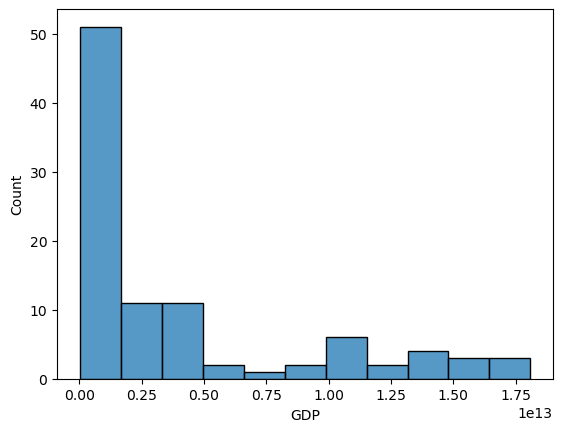

In [17]:
sns.histplot(data["GDP"])
plt.show()
plt.clf()

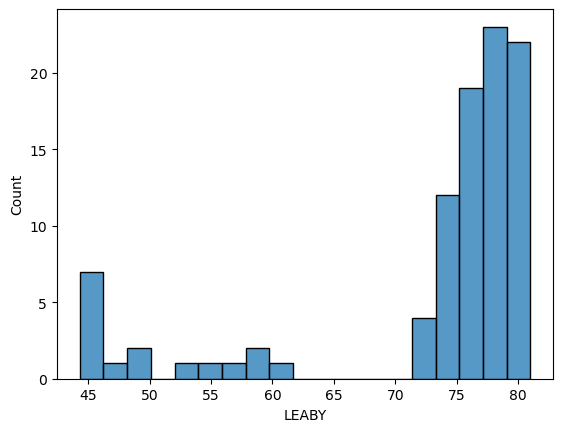

In [18]:
data = data.rename({"Life expectancy at birth (years)":"LEABY"}, axis = "columns")

sns.histplot(data["LEABY"])
plt.show()
plt.clf()

This is what these graphs tell us:

- There are 6 countries: Chile, China, Germany, Mexico, USA, Zimbabwe
- The data available is from 2000 to 2015.
- There are incredibly big numbers in the GPD section, that makes the histogram provide no real data.
- For life expectancy, the plot is more informative: most coutnries have their value in the 70-80 range, but the graph is still not heavily informative.

## Data Analysis

Let's look at the actual relationship. First, let's plot GDP against life expectancy, and use data from all countries, to uncover the relationship from the bigger picture.

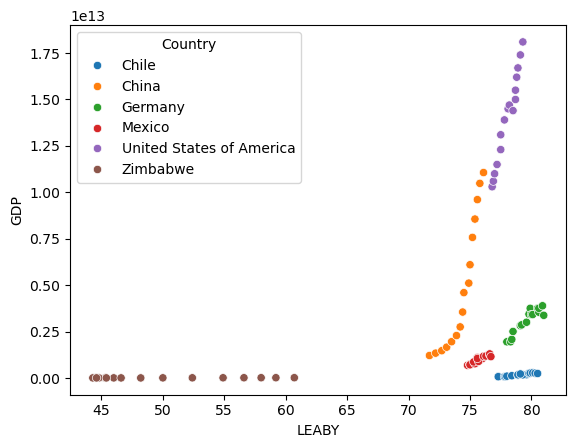

In [19]:
sns.scatterplot(x = data["LEABY"], y = data["GDP"], hue = data["Country"])
plt.show()
plt.clf()

In the above graph, you can see a general positive correlation between GDP and life expectancy. Different countries take different shapes, China takes more exponential growth while Chile and Germany look more linear.

But there is no general quantifiable trend to be seen on this graph. Zimbabwe's GDP growth (if any) is not comparable with the amount of growth in life expectancy. Perhaps a better way to understand this problem is look at the year-by-year data for each country, and draw conclusions from those graphs.

<Figure size 640x480 with 0 Axes>

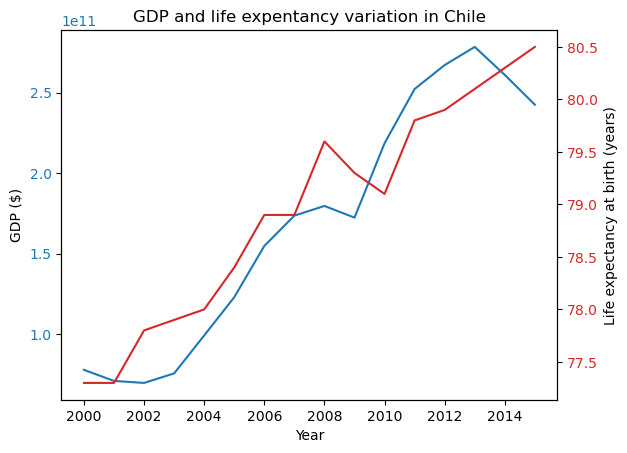

<Figure size 640x480 with 0 Axes>

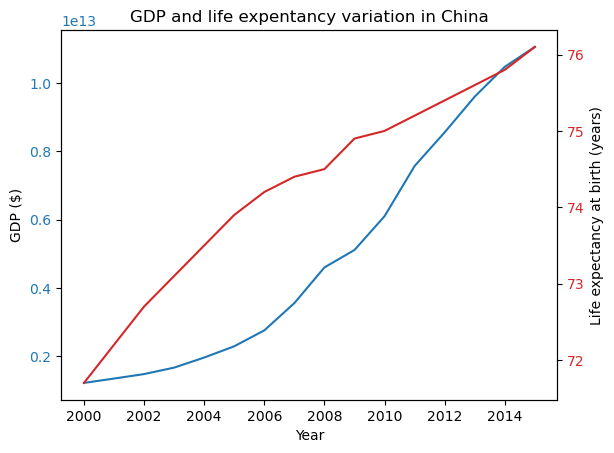

<Figure size 640x480 with 0 Axes>

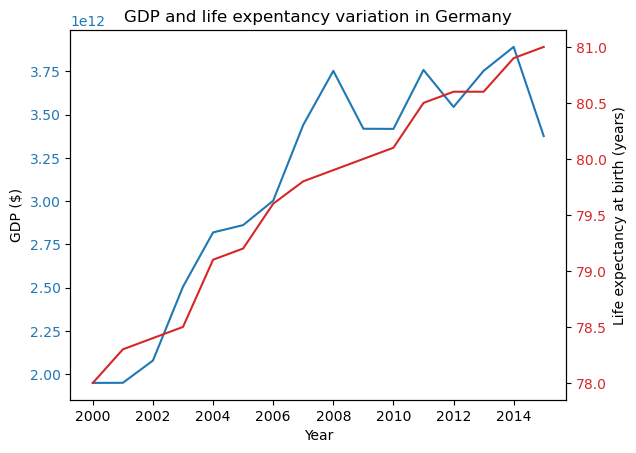

<Figure size 640x480 with 0 Axes>

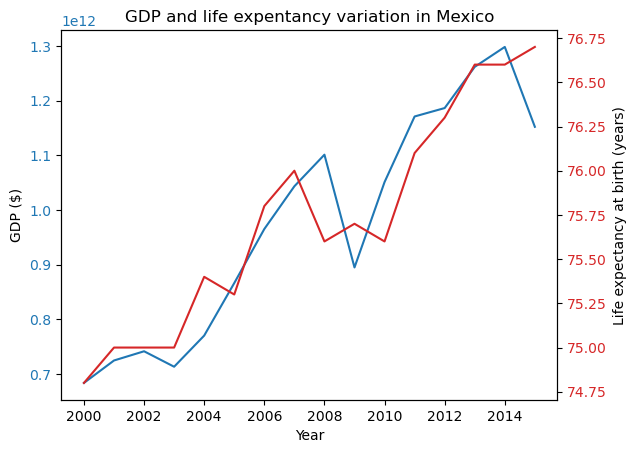

<Figure size 640x480 with 0 Axes>

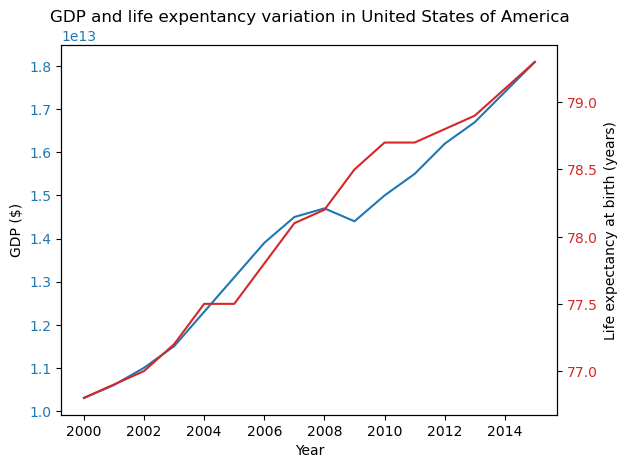

<Figure size 640x480 with 0 Axes>

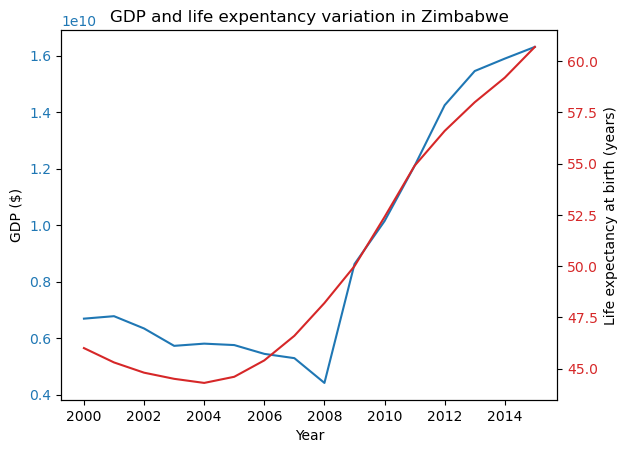

In [20]:


for country in countries:
    years = data.loc[data["Country"] == country, ["Year"]]
    gdp = data.loc[data["Country"] == country, ["GDP"]]
    leaby = data.loc[data["Country"] == country, ["LEABY"]]

    fig, ax1 = plt.subplots()
    ax1.set_xlabel("Year")
    ax1.set_ylabel("GDP ($)")
    ax1.plot(years, gdp, color = 'tab:blue')
    ax1.tick_params(axis = 'y', labelcolor = 'tab:blue')

    ax2 = ax1.twinx()

    ax2.set_ylabel("Life expectancy at birth (years)")
    ax2.plot(years, leaby, color = 'tab:red')
    ax2.tick_params(axis = 'y', labelcolor = 'tab:red')

    plt.title("GDP and life expentancy variation in {0}".format(country))

    plt.show()
    plt.clf()

We can see on the plots above that when magnified, all countries show growth in both life expectancy and GDP over the years, and that they follow a similar shape. In the case of Zimbabwe, where the life expectancy is varied on the biggest scale, this trend is the most visible: after 2008, as the GDP started to grow rapidly, the life expectancy as started to grow by staggering amounts.

However, it is important to note the difference in the scales between countries. Perhaps a good way to compare these values across countries is by amount/rate of growth.

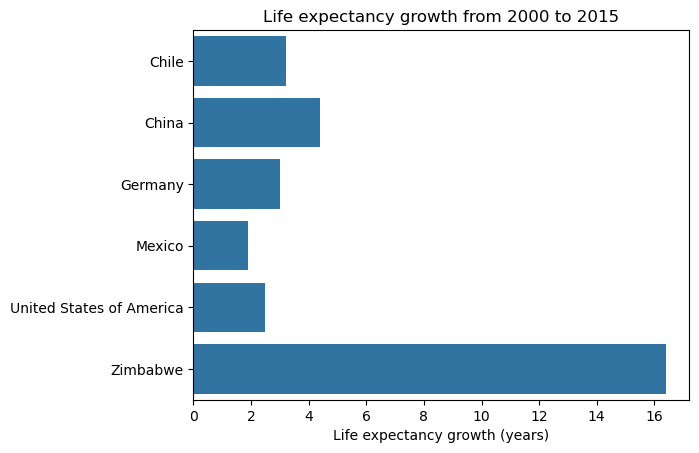

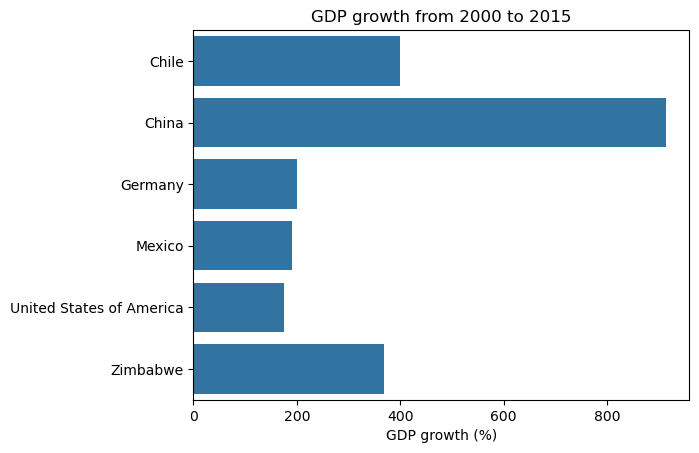

In [21]:
max_values = data.drop("Year", axis = 1).groupby("Country").max()
min_values = data.drop("Year", axis = 1).groupby("Country").min()

leaby_diff = max_values["LEABY"] - min_values["LEABY"]
gdp_growth = (max_values["GDP"] / min_values["GDP"])*100

sns.barplot(x = leaby_diff, y = countries)
plt.title("Life expectancy growth from 2000 to 2015")
plt.xlabel("Life expectancy growth (years)")
plt.show()
plt.clf()

sns.barplot(x = gdp_growth, y = countries)
plt.title("GDP growth from 2000 to 2015")
plt.xlabel("GDP growth (%)")
plt.show()
plt.clf()

From these graphs we can see that most countries, life expectancy growth is under 4 years, whereas for Zimbabwe, over those 15 years, over 16 years was added to the life expectancy at birth.
The same pattern is not observable in the GDP growth. While Zimbabwe had considerable growth, well over tripling their GDP, it is China that outperforms all countries on the list, with a staggering 8-fold growth over such a short time period.

In general, this means that while there is a positive correlation between GDP and life expectancy, there is no quantifiable way to say how much they influence each other. 